# Notebook 3:  Redes de Kohonen y SOM (Self organized maps)
En este notebook vamos a implementar el algoritmo de clustering SOM en R. El objetivo es entender como funciona este algoritmo y  aprender a utilizarlo con un ejemplo simple. Recuerde instalar previamente el paquete kohonen en R.



In [22]:
# Librerias necesarias
# install.packages("kohonen")

In [23]:
library(kohonen)
set.seed(7)

#ruta datos
#lee datos del archivo de texto como una matriz. La primera #columna se utiliza como vector de nombres de las filas
datos <-read.table("milk1.dat",row.names=1,dec=".",header=TRUE)
datos <- as.data.frame(datos)
summary(datos)
head(datos)

     WATER          PROTEIN            FAT           LACTOSE     
 Min.   :44.90   Min.   : 0.600   Min.   : 1.00   Min.   :0.000  
 1st Qu.:71.30   1st Qu.: 3.000   1st Qu.: 3.40   1st Qu.:2.700  
 Median :82.00   Median : 5.900   Median : 6.30   Median :4.700  
 Mean   :78.18   Mean   : 6.212   Mean   :10.31   Mean   :4.132  
 3rd Qu.:87.70   3rd Qu.: 9.700   3rd Qu.:13.10   3rd Qu.:5.600  
 Max.   :90.40   Max.   :12.300   Max.   :42.00   Max.   :6.900  
      ASH        
 Min.   :0.1000  
 1st Qu.:0.5300  
 Median :0.8000  
 Mean   :0.8632  
 3rd Qu.:1.1000  
 Max.   :2.3000  

,WATER,PROTEIN,FAT,LACTOSE,ASH
HORSE,90.1,2.6,1.0,6.9,0.35
ORANGUTAN,88.5,1.4,3.5,6.0,0.24
MONKEY,88.4,2.2,2.7,6.4,0.18
DONKEY,90.3,1.7,1.4,6.2,0.40
HIPPO,90.4,0.6,4.5,4.4,0.10
CAMEL,87.7,3.5,3.4,4.8,0.71


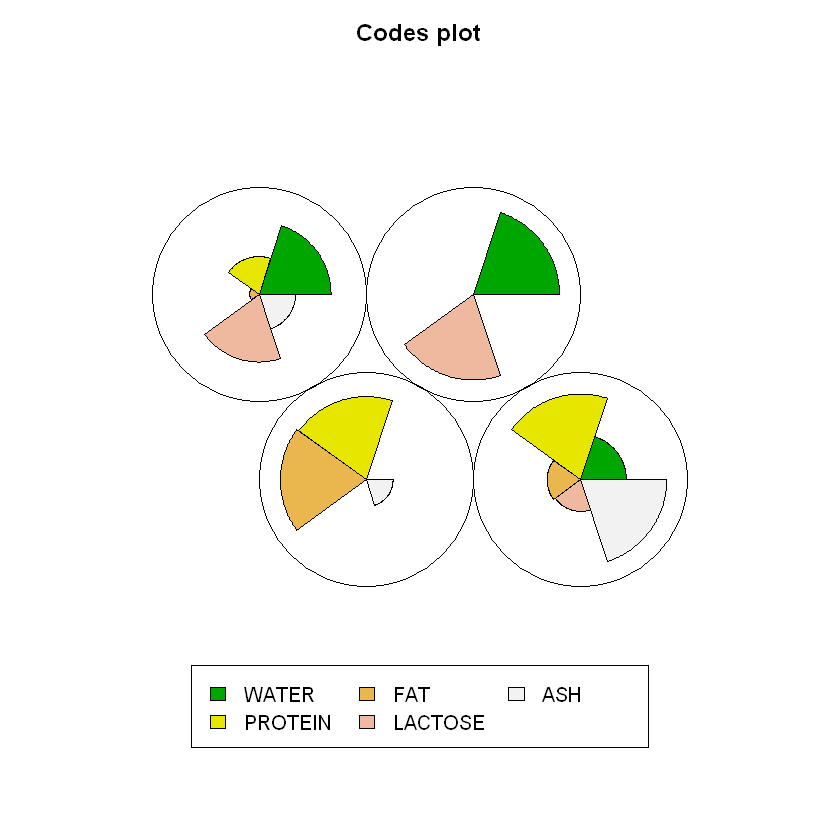

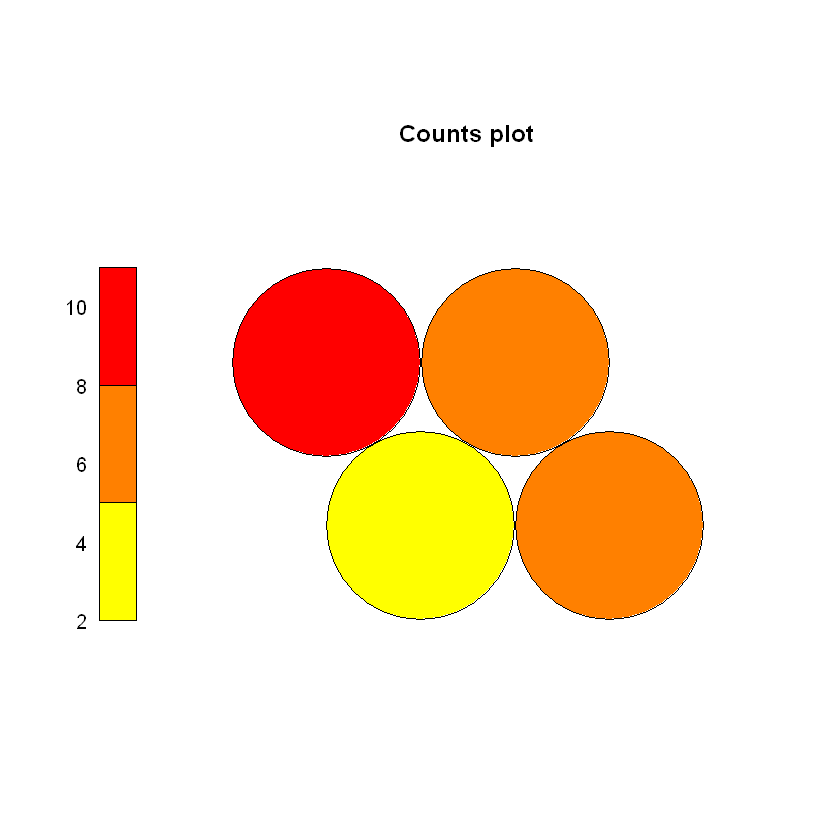

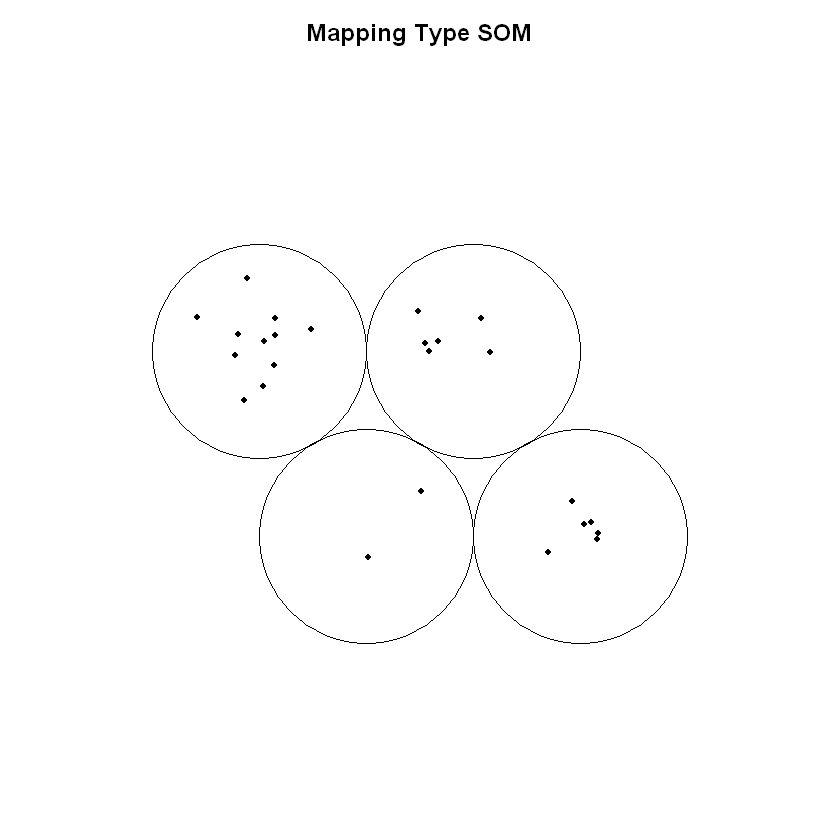

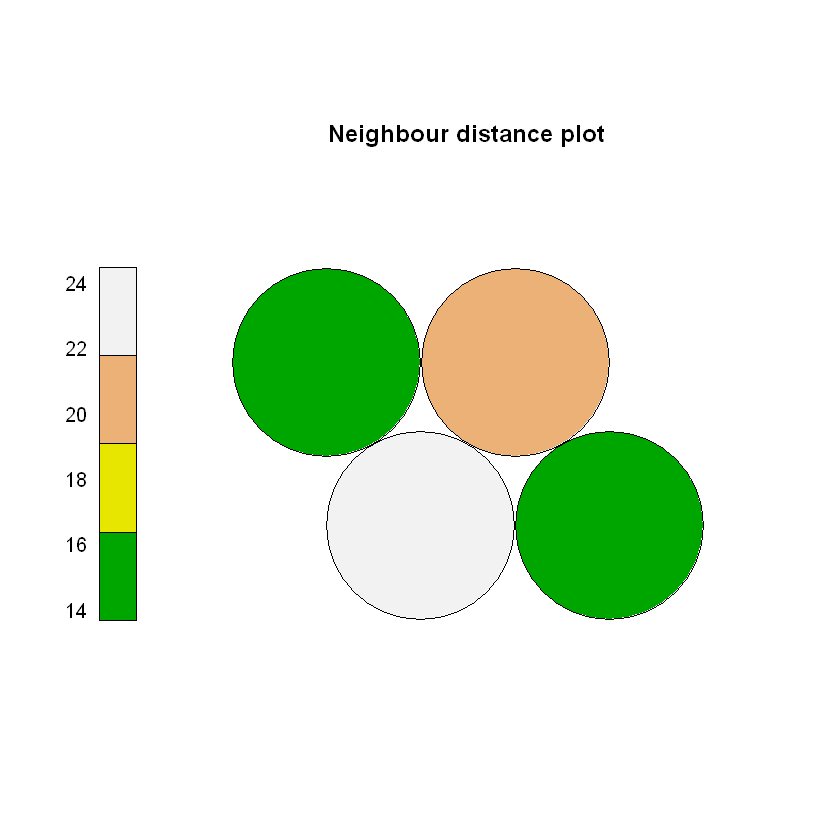

In [24]:
#create SOM grid
sommap <- som(scale(datos), grid = somgrid(2, 2, "hexagonal"))
plot(sommap)

colors <- function(n, alpha = 1) {
    rev(heat.colors(n, alpha))
}

plot(sommap, type = "counts", palette.name = colors, heatkey = TRUE)

plot(sommap, type = "mapping", pchs = 20, main = "Mapping Type SOM")

plot(sommap, type = "dist.neighbours", palette.name = terrain.colors)

Ejercicio 1: 

a) Explique como funciona el método som, describa parámetros de entrada y salida y los gráficos obtenidos.

b) Modifique parámetros de entrada. Interprete y comente los resultados obtenidos. 

In [25]:
#       1.a)

# A considerar:
# Un NODO se le llama a cada cuadrito en una GRILLA/GRID, en este caso son las pelotitas de los gráficos
# Dentro de cada nodo hay OBSERVACIONES o DATOS (en este caso son las filas, los animales),
# y con esto se genera un PESO DE VARIABLES (en este caso son las columnas, water, fat, protein, lactose, ash)


# referencia: https://www.rdocumentation.org/packages/kohonen/versions/2.0.19/topics/som
# ultimo ppt

# ¿Cómo funciona el método som? Dar parámetros de entrada y salida. ¿Qué indican los gráficos?
# La función SOM corresponde a Self- Organising Maps
# Utiliza una red neuronal que espera una entrada con datos multidimensionales (algoritmo de kohonen)
# Para el featured map utiliza distancia euclidiana entre nodos
# Teniendo como salida un featured map de menor dimensión (en este caso, y generalmente, 2D)

# ENTRADAS:

# data -> Matriz de datos (escalada), siendo cada fila un elemento distinto
# grid -> De la mano con la función - somgrid - La grilla, para el tamaño u otras especificaciones como forma
# rlen -> Número de veces que "data" se presenta a la network, con un valor muy bajo podría perderse precisión en los datos, default 100
# alpha -> Tasa de aprendizaje, disminuye linealmente entre 2 valores dados, default c(0.05, 0.1)
# radius -> El radio de la vecindad o radio de activación de los datos, default quantile(nhbrdist, 0.67) * c(1, -1)
# init -> Datos iniciales para la red neuronal, default -> valores aleatorios de los datos dados
# toroidal -> si es VERDADERO, los bordes del mapa se unen.
# keep.data -> guarda la data en objecto.

#Ver que variables tiene sommap
# names(sommap)


#SALIDAS:

# Un objeto de clase kohonen con componentes:
# data <- matriz de datos, solo si keep.data = True
# grid <- objeto de tipo "somgrid", da la estructura del grid, posiciones y forma
# codes <- da una matriz con los pesos de cada nodo del feature map (ver gráfico 1)
# changes <- Vector de desviacion de promedios de "codes" por cada iteración hecha (se relaciona con rlen) es importante si se quiere saber convergencia
# unit.classif <- nodos activados observación, nos da un vector con la asignacion de c/nodo según el dato, solo se retorna si keep.data == TRUE
# distances <- distancia de observación al nodo activado (unit.classif), solo se retorna si keep.data == TRUE  (las distancias suelen bajar si rlen es un numero más grande)
# toroidal <- si se usa o no






# ¿ Qué son los gráficos?
# Primero existen distintos tipos de graficos de 'som', definidos como type = "codes", "changes", "counts","dist.neighbours", "mapping", "property", "quality"

# Los gráficos desplegados muestran:
# 1. Los pesos de cada variable, siendo representados de manera más grande los números que, valga la redundancia, son más grandes. Este valor se saca de "codes" 
# 2. El número de veces observaciones por nodo, este dato se relaciona con el valor de rlen, si rlen es muy bajo las observaciones pueden bajar
# 3. Donde se ubican los datos observados en cada nodo (es una forma más precisa que el gráfico 2)
# 4. Muestra la suma de las distancias a todos los vecinos inmediatos, si el número es pequeño y hay hartos datos (observaciones) se espera una concentración de estos

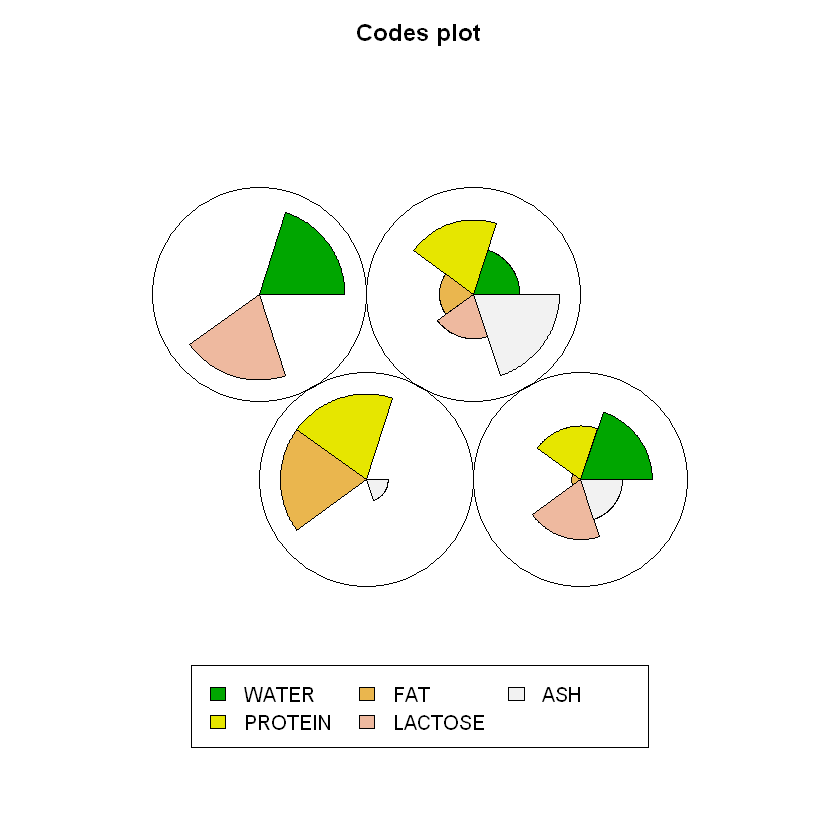

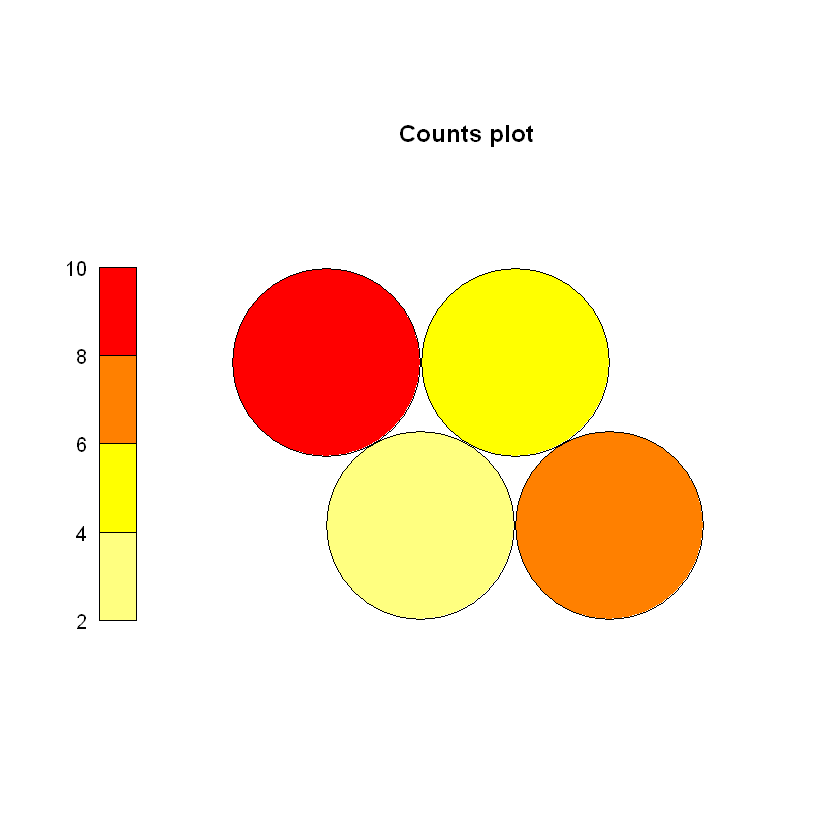

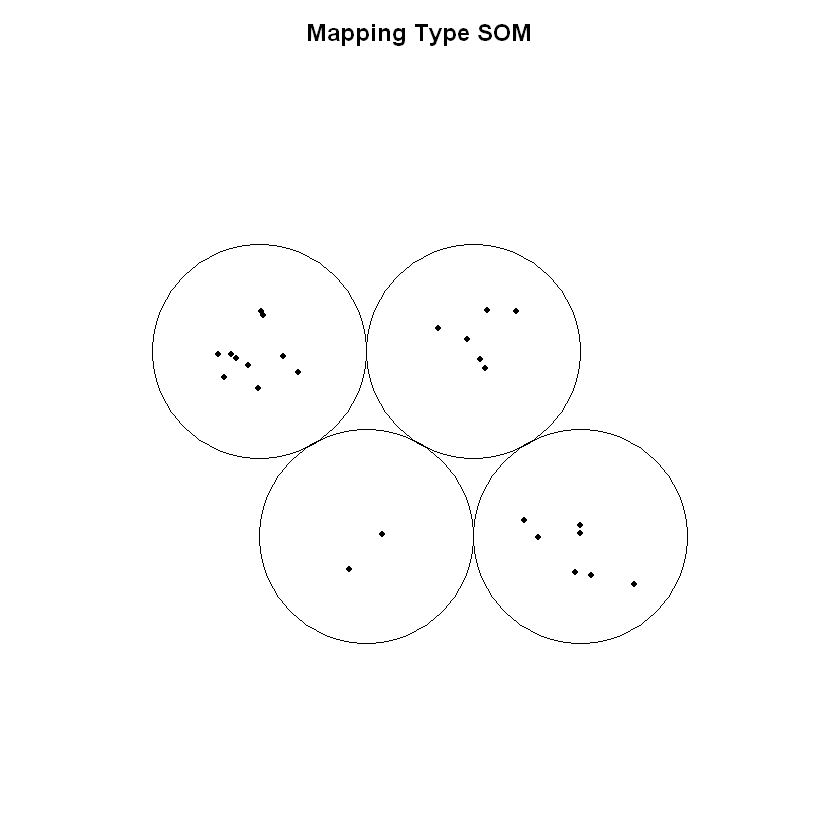

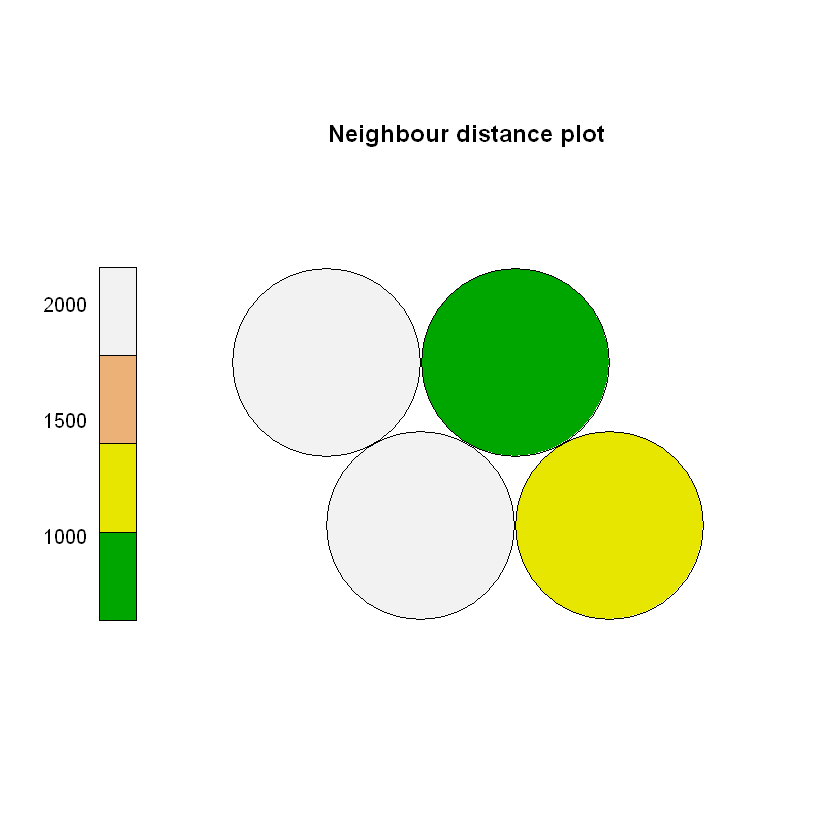

In [26]:
#       1.b)


sommap <- som(as.matrix(datos), grid = somgrid(2,2, "hexagonal"))
plot(sommap)

colors <- function(n, alpha = 1) {
    rev(heat.colors(n, alpha))
}

plot(sommap, type = "counts", palette.name = colors, heatkey = TRUE)
plot(sommap, type = "mapping", pchs = 20, main = "Mapping Type SOM")
plot(sommap, type = "dist.neighbours", palette.name = terrain.colors)

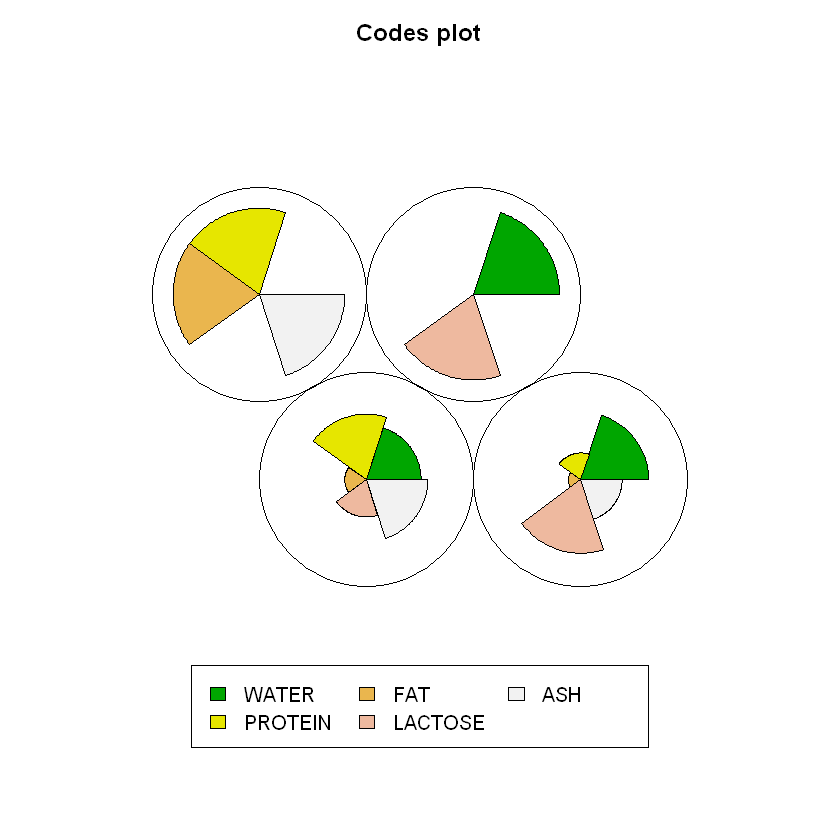

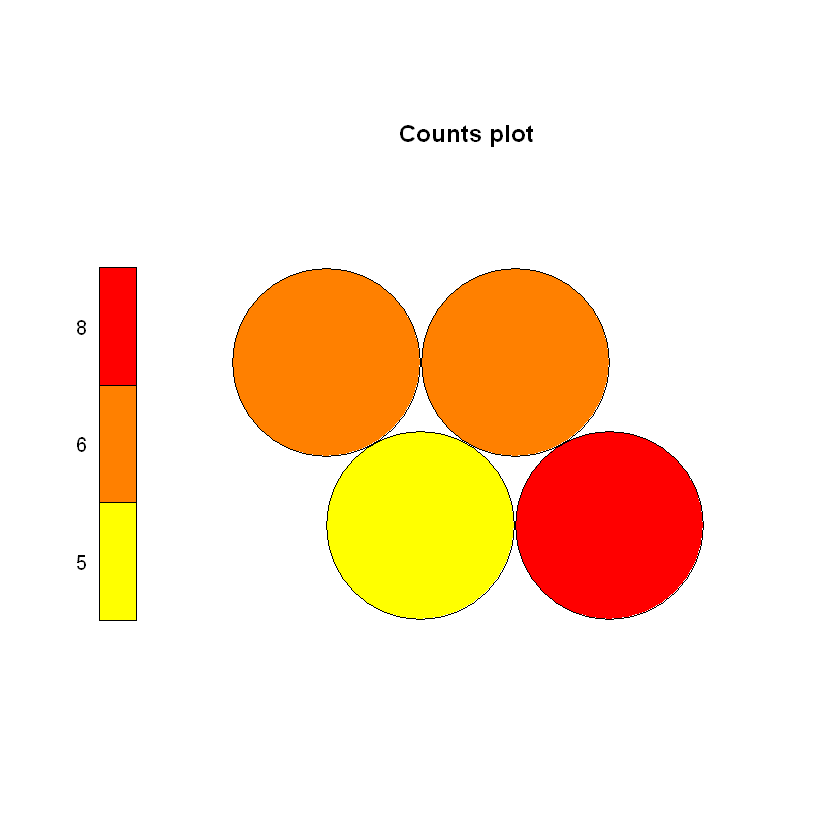

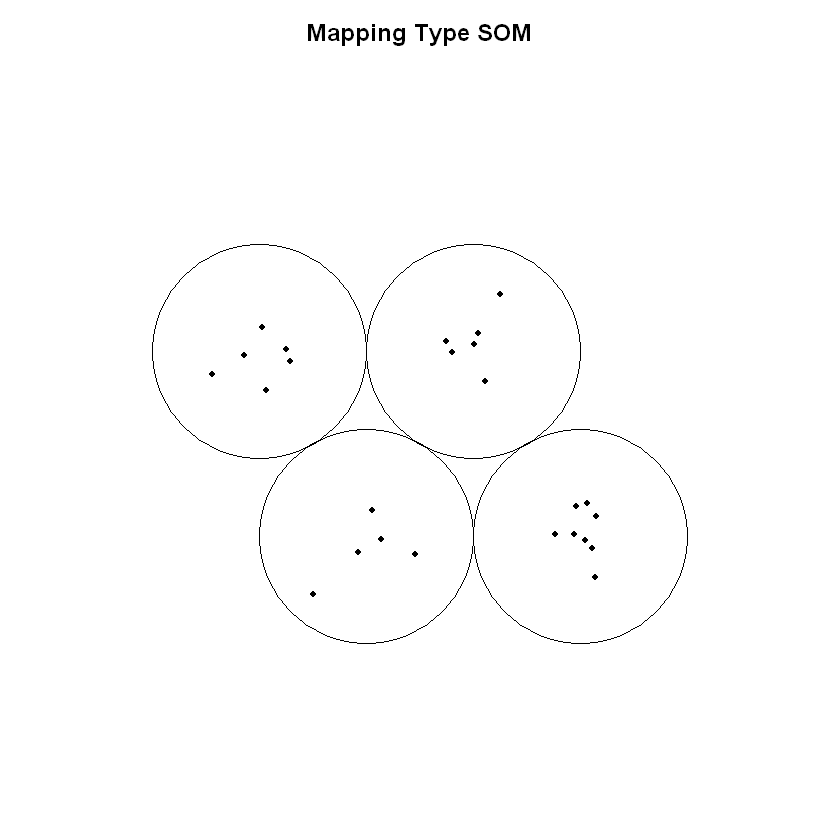

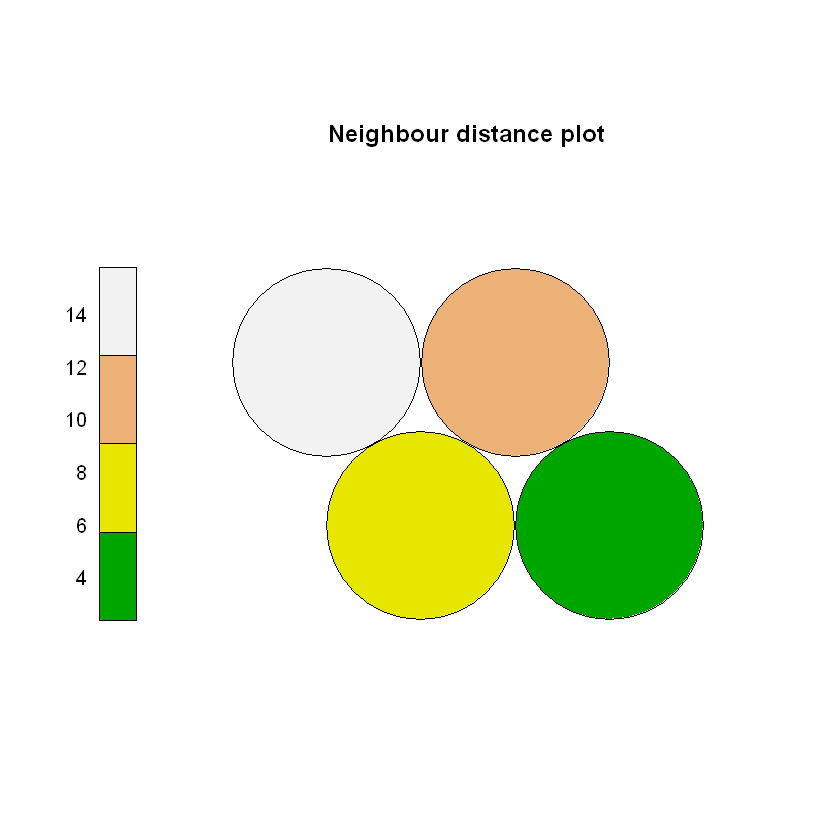

In [27]:
sommap <- som(scale(datos),rlen=50 ,grid = somgrid(2,2, "hexagonal"))
plot(sommap)

colors <- function(n, alpha = 1) {
    rev(heat.colors(n, alpha))
}

plot(sommap, type = "counts", palette.name = colors, heatkey = TRUE)
plot(sommap, type = "mapping", pchs = 20, main = "Mapping Type SOM")
plot(sommap, type = "dist.neighbours", palette.name = terrain.colors)

**b)** Si se aplica el método som a los datos sin escalarlos, se puede observar en general los 4 grupos no cambian sus valores de proteína, agua, lactosa y ASH, pero si se puede notar una diferencia en la cantidad de animales que componen los grupos y la distancia entre ellos.
 Si se cambia el rlen de 100 a 50, podemos notar que los resultados no varían significativamente, pero también vale recalcar que los resultados varían también respecto a cada iteración, por lo que con los mismo valores no siempre obtendremos los mismos resultados.

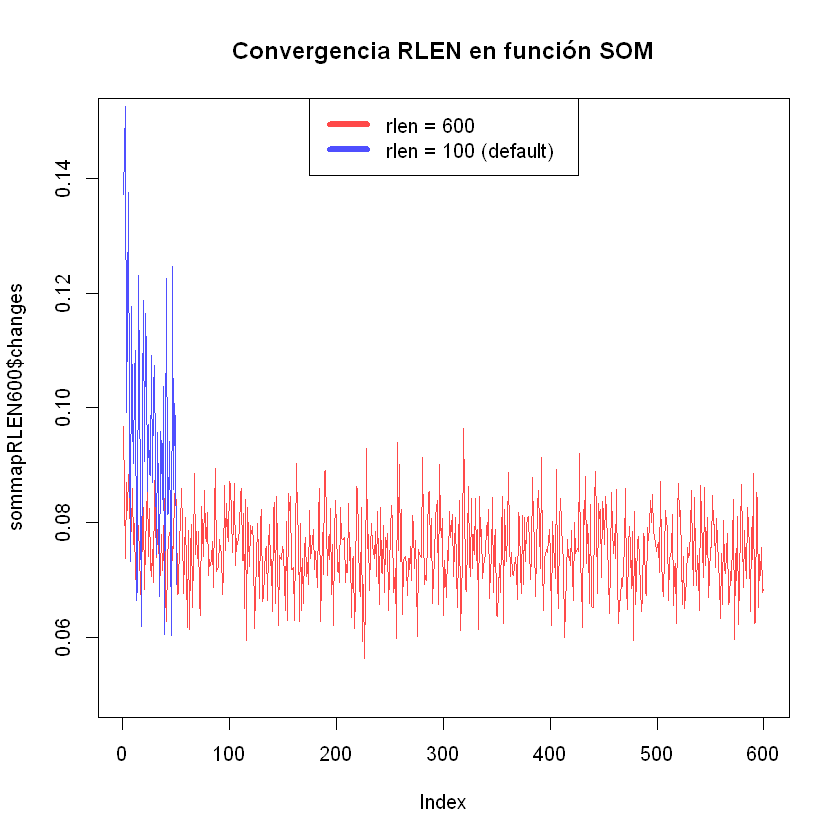

In [28]:
#       1.b


# Además, al modificar rlen y como se mencionó antes, con la variable changes podemos ver los cambios de las medias de los nodos
# Que al graficarlo, podemos observar que a partir de rlen = 150-200 no parecen haber cambios signficativos en el comportamiento
# De todas formas, con rlen = 100 (por defecto) no se aleja mucho del resultado 'ideal'
sommapRLEN600 <- som(scale(datos), grid = somgrid(2, 2, "hexagonal"), rlen = 600)
plot(sommapRLEN600$changes,type="l",col="#FF4949", ylim= c(0.05,0.15), main = "Convergencia RLEN en función SOM")
lines(sommap$changes,col="#4F4FFF")
legend(x = "top", inset = 0, legend=c("rlen = 600", "rlen = 100 (default)"),col = c("#FF4949","#4F4FFF"), lwd=5, cex=1., horiz = FALSE)

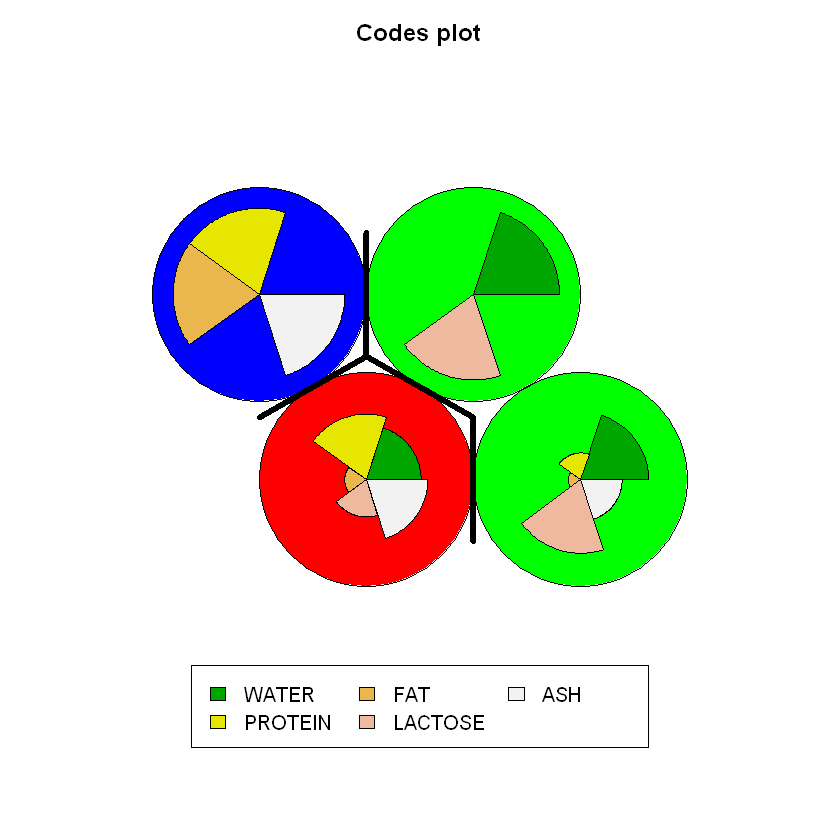

In [29]:
mat <- matrix(sommap$codes[[1]], ncol=4,nrow=4,byrow=FALSE)

#sommap$codes[[1]] # Selecciona la tabla de datos que se convirtieron en grid
#matrix en este caso pasa la tabla a una matriz numérica, especificando 4 col y 4 filas
## use hierarchical clustering to cluster the codebook vectors
groups<-3
som.hc <- cutree(hclust(dist(mat)), groups)

#plot
plot(sommap, type="codes", bgcol=rainbow(groups)[som.hc])

#cluster boundaries
add.cluster.boundaries(sommap, som.hc)


Ejercicio 2: 

a) Explique como funciona esta nueva visualización.
- Lo que se realizo anteriormente fue aplicar el metodo de agrupamiento jerarquico a los valores de los 4 grupos obtenidos con el metodo som, paro ahora tomando solo 3 grupos, de tal forma que ahora podemos observar los grupos que son mas equivalentes entre si y tambien los que son mas distintos.


b) Interprete y comente los resultados obtenidos. 
- al aplicar el método de agrupamiento jerárquico, para los 4 grupos, donde ahora los reclasificamos en 3 grupos. Podemos notar los 2 grupos que tienen más similitudes entre sí, lo que podemos verificar al ver que sus componentes principales en la leche de estos 2 grupos son el agua y la lactosa, mientras que los demás grupos no tienen una clara relación en la proporción de los componentes en la leche.


Ejercicio 3: 

a) De los datos en el archivo comunas.csv escoja un subconjunto de datos a los cuales aplicar este algoritmo. Justifique su elección

b) Realice las estimaciones, discuta sus resultados y proponga una estrategia gráfica para representarlos.

In [30]:
#       3.a


#Inicializando datos
datos <- read.csv("comunas.csv", row.names = 2 ,header=TRUE,sep=";",dec=".")
dim(datos)
head(datos)

#Filtrando Region Metropolitana
datos <- datos[datos$Region=='13',c(1,2,3,4,5,6,7,8,9,10,11,12,13)]
dim(datos)
head(datos)


#Filtrando Poblacion, ingreso per capita, pobreza, escolaridad, indice de desarrollo humano
datos <- datos[, c(2,4,5,6,10)]
dim(datos)

# ¿Por qué la RM y estos datos?
# Como en un trabajo anterior de clustering habíamos utilizado estos datos nos sirve como comparativa y ver qué tal lo hace el algoritmo SOM
# Se escogieron 5 datos que a simple vista pueden estar relacionados (pobreza, escolaridad, indice de desarollo, etc)
# Pero al ser un método SOM, la misma función debe utilizar la entrada para hacer la agrupación adecuada "sin conocer la categorización de los datos"
# Además al ser multidimensional, con 5 datos (propiedades/columnas) nos sirve para pasarlo a una representación 2D


[1] 323  13

,Region,Poblacion..miles..2011,IDSE,Ingreso.per.cï..p..Mens..miles....2006.11,Pobreza...2006.11,Escolaridad..aï..os..2006.11,Material.Vivienda.bueno.o.acceptable...2006,Alcantarillado.o.Fosa.S.pt....2006,Esperanza.vida.al.nacer..aï..os..2005.10,X.ndice.Desarrollo.Humano,Tasa.AVPP.x.1000.h.2007.11,X..defunc..50..aï..os.2011,Mortalidad.Infantil.x.1000.NV.2009.11
Iquique,1,186.0,0.698,227.6,10.2,11.1,81.8,98.8,77.2,0.631,82.1,73.0,8.9
Pica,1,18.6,0.604,188.1,12.2,9.6,71.0,94.0,77.5,0.572,23.0,45.8,9.8
Pozo Almonte,1,17.3,0.591,176.0,9.8,9.7,73.1,83.5,77.3,0.574,44.3,66.7,7.1
Alto Hospicio,1,93.8,0.577,166.3,20.9,10.1,65.9,98.4,78.1,0.555,46.7,56.2,4.9
Huara,1,3.4,0.382,161.4,10.0,7.6,49.0,38.9,81.8,0.592,55.8,44.4,8.9
Calama,2,148.8,0.717,269.3,8.5,10.9,85.0,98.9,76.2,0.625,87.2,63.4,9.7


[1] 52 13

,Region,Poblacion..miles..2011,IDSE,Ingreso.per.cï..p..Mens..miles....2006.11,Pobreza...2006.11,Escolaridad..aï..os..2006.11,Material.Vivienda.bueno.o.acceptable...2006,Alcantarillado.o.Fosa.S.pt....2006,Esperanza.vida.al.nacer..aï..os..2005.10,X.ndice.Desarrollo.Humano,Tasa.AVPP.x.1000.h.2007.11,X..defunc..50..aï..os.2011,Mortalidad.Infantil.x.1000.NV.2009.11
Vitacura,13,79.6,0.992,1143.1,2.0,15.0,98.0,100.0,82.0,0.991,45.6,88.6,6.6
Las Condes,13,288.1,0.970,953.0,1.7,14.7,97.9,99.6,82.2,0.972,39.6,87.4,5.1
Providencia,13,126.6,0.968,966.7,1.3,14.6,95.8,100.0,80.0,0.931,57.7,89.7,8.0
Nunoa,13,145.1,0.892,569.3,4.1,13.7,95.7,100.0,79.4,0.841,64.4,88.5,6.7
Santiago,13,164.0,0.833,487.5,6.9,13.1,87.1,98.5,76.0,0.733,108.3,79.0,6.3
La Reina,13,95.5,0.831,530.5,5.8,12.6,86.5,100.0,80.0,0.808,53.2,86.3,5.0


[1] 52  5

In [31]:
# Todas las comunas y datos a considerar
datos

,Poblacion..miles..2011,Ingreso.per.cï..p..Mens..miles....2006.11,Pobreza...2006.11,Escolaridad..aï..os..2006.11,X.ndice.Desarrollo.Humano
Vitacura,79.6,1143.1,2.0,15.0,0.991
Las Condes,288.1,953.0,1.7,14.7,0.972
Providencia,126.6,966.7,1.3,14.6,0.931
Nunoa,145.1,569.3,4.1,13.7,0.841
Santiago,164.0,487.5,6.9,13.1,0.733
La Reina,95.5,530.5,5.8,12.6,0.808
Lo Barnechea,109.6,587.9,7.7,11.6,0.793
San Miguel,71.0,339.0,6.9,12.3,0.679
La Florida,398.4,261.2,9.5,11.5,0.722
Maipu,548.8,260.9,8.2,11.6,0.739


 Poblacion..miles..2011 Ingreso.per.cï..p..Mens..miles....2006.11
 Min.   :  4.60         Min.   : 135.8                           
 1st Qu.: 65.25         1st Qu.: 163.1                           
 Median : 92.20         Median : 185.9                           
 Mean   :127.84         Mean   : 264.2                           
 3rd Qu.:131.57         3rd Qu.: 239.6                           
 Max.   :735.40         Max.   :1143.1                           
 Pobreza...2006.11 Escolaridad..aï..os..2006.11 X.ndice.Desarrollo.Humano
 Min.   : 1.300    Min.   : 7.80                Min.   :0.4820           
 1st Qu.: 8.975    1st Qu.: 9.70                1st Qu.:0.5430           
 Median :10.900    Median :10.20                Median :0.5820           
 Mean   :11.063    Mean   :10.54                Mean   :0.6162           
 3rd Qu.:13.100    3rd Qu.:11.00                3rd Qu.:0.6338           
 Max.   :20.100    Max.   :15.00                Max.   :0.9910           

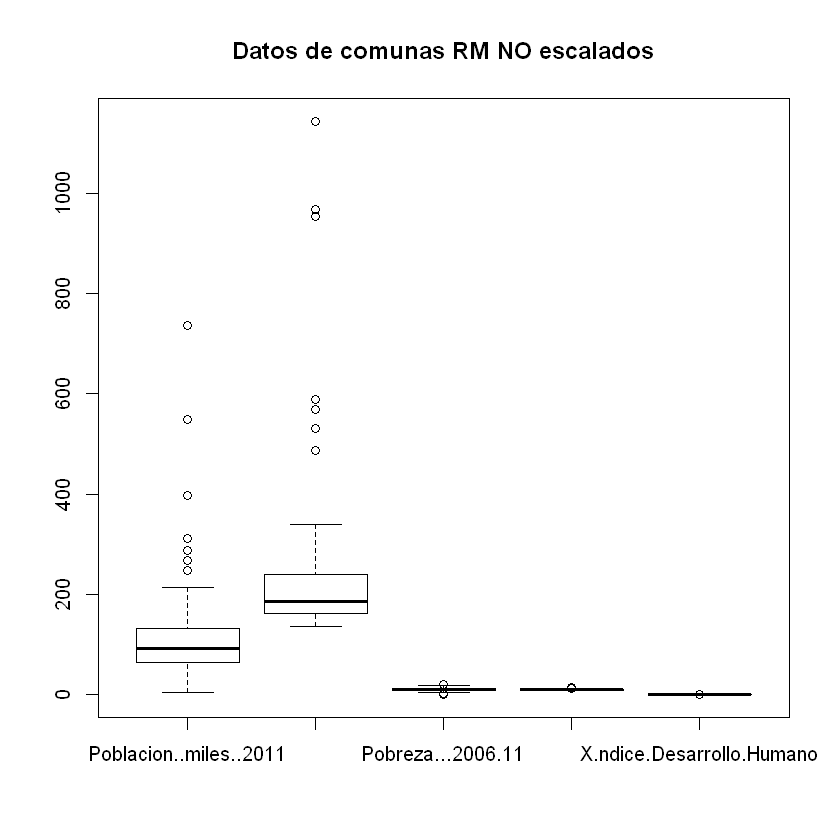

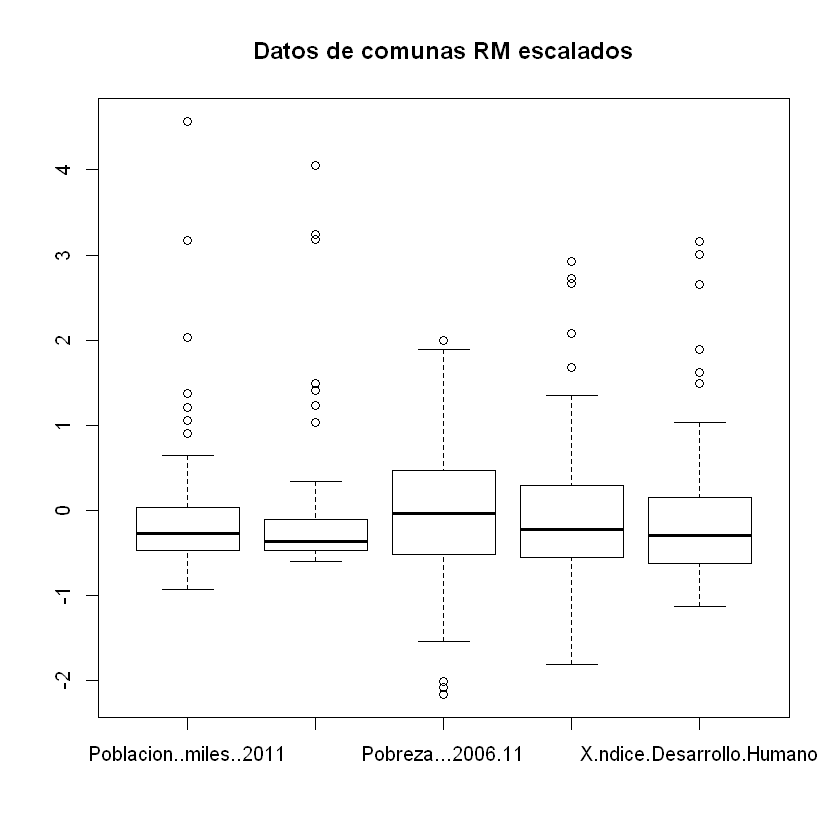

In [32]:
summary(datos)
boxplot(datos, main = "Datos de comunas RM NO escalados")
boxplot(scale(datos), main = "Datos de comunas RM escalados")

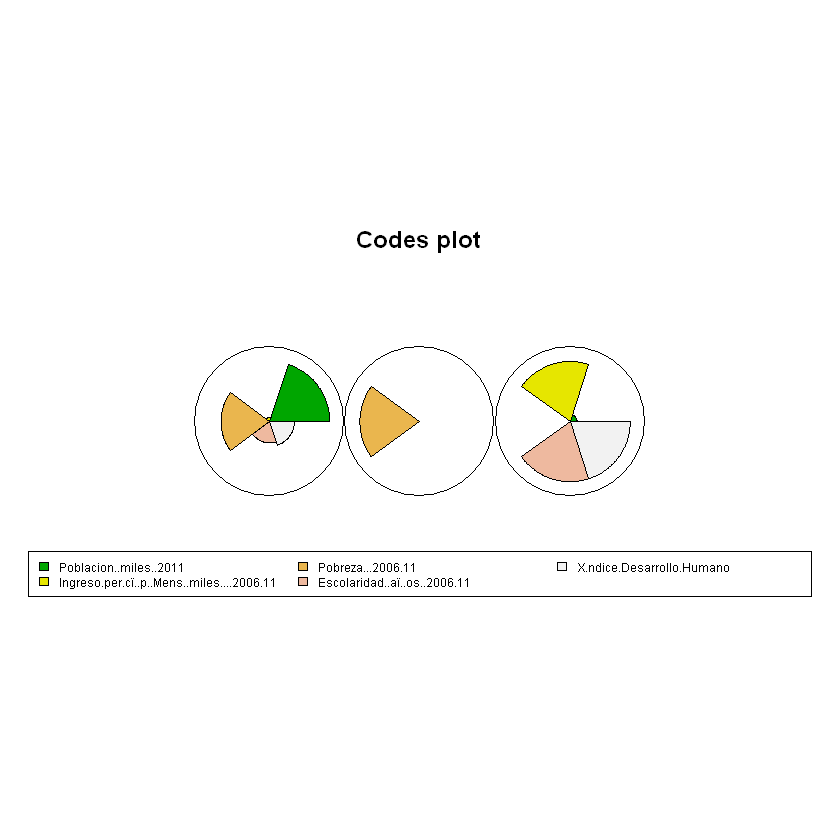

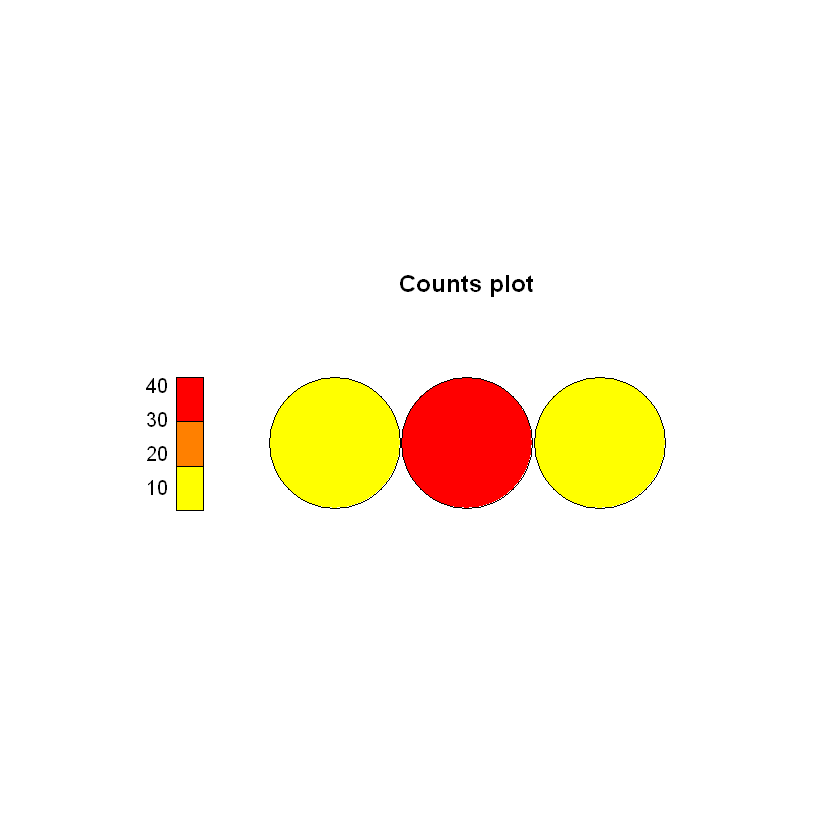

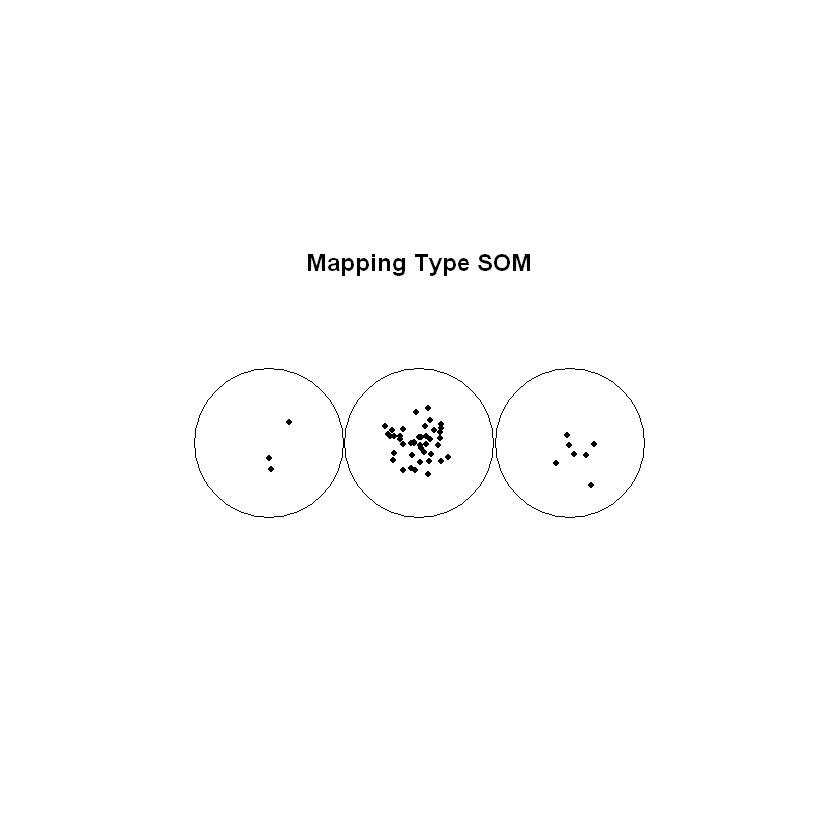

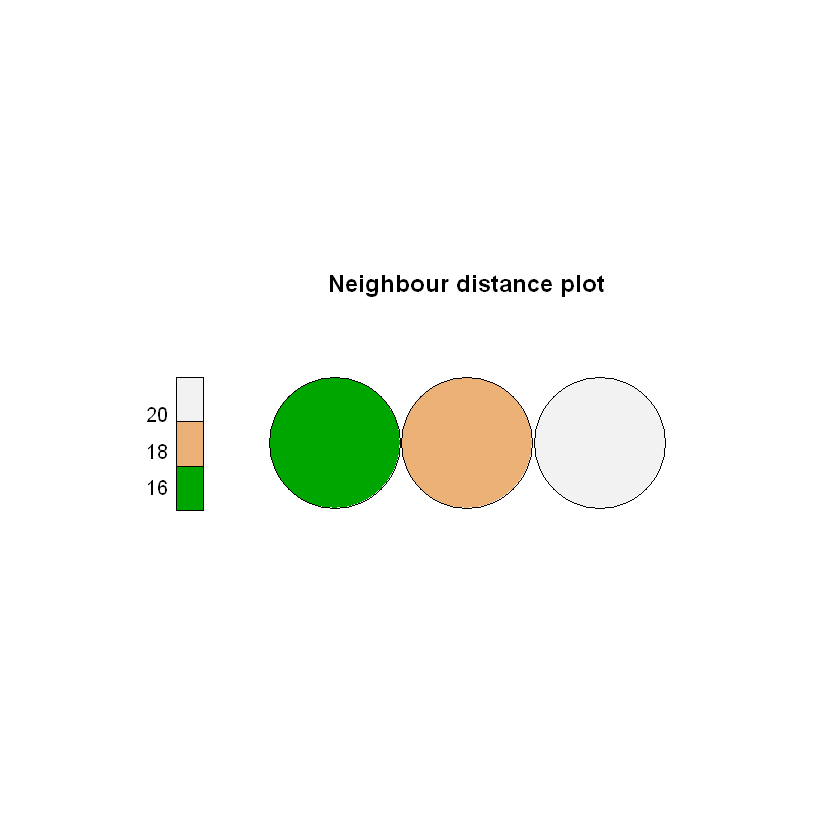

In [33]:
#       3.b


# Se escalan los datos y se grafican
datosS <- scale(datos)


# Se grafican 1 fila y 3, esto significa que tendremos 3 Nodos
# La razón de tener 3 nodos es porque se testeó antes y es lo agrupación que parece más adecuada, además para los clustering anteriores (tarea 3) se utilizó k0=3
# siendo k0 la cantidad de grupos (en este caso, nodos)

sommap <- som(datosS, grid = somgrid(3, 1, "hexagonal"),rlen= 500)
plot(sommap)

colors <- function(n, alpha = 1) {
    rev(heat.colors(n, alpha))
}

plot(sommap, type = "counts", palette.name = colors, heatkey = TRUE)

plot(sommap, type = "mapping", pchs = 20, main = "Mapping Type SOM")

plot(sommap, type = "dist.neighbours", palette.name = terrain.colors)

# Con los gráficos de SOM, en concreto Codes plot que nos da los peso de cada variable
# Podemos observar como en el primer nodo la Pobreza es el factor más alto
# En el segundo nodo pese a tener un poco de escolaridad e indice de desarrollo humano, también se presenta pobreza y una gran población en miles en esas ciudades
# Por último el tercer nodo presenta una población pequeña, con ingreso per capita mensuales en miles altos, junto a una escolaridad alta y un alto desarrollo humano
# Y en cuanto a pobreza practicamente no presenta


In [34]:
# Con esta variable tenemos al grupo que corresponde cada comuna
# sommap$unit.classif

nombreComunas <- row.names(datos)
grupoComuna <- sommap$unit.classif

# Cada comuna y su respectivo nodo
for (comuna in 1:dim(datos)[1]){
    message(sprintf("%s %i",nombreComunas[comuna], grupoComuna[comuna]))
}

Vitacura 3
Las Condes 3
Providencia 3
Nunoa 3
Santiago 3
La Reina 3
Lo Barnechea 3
San Miguel 2
La Florida 1
Maipu 1
Independencia 2
La Cisterna 2
Quilicura 2
Estaciï¿½n Central 2
Macul 2
Talagante 2
Quinta Normal 2
Cerrillos 2
Puente Alto 1
Calera de Tango 2
Penalolen 2
Peï¿½aflor 2
Pudahuel 2
Colina 2
Conchalï¿½ 2
Pedro Aguirre Cerda 2
Huechuraba 2
Pirque 2
Lo Prado 2
San Jos? de Maipo 2
Buin 2
San Joaquï¿½n 2
Recoleta 2
Curacavï¿½ 2
El Bosque 2
Padre Hurtado 2
San Bernardo 2
Lo Espejo 2
Renca 2
Isla de Maipo 2
La Granja 2
Paine 2
Melipilla 2
El Monte 2
Tiltil 2
San Ramï¿½n 2
Cerro Navia 2
La Pintana 2
Lampa 2
Alhu? 2
Marï¿½a Pinto 2
San Pedro 2


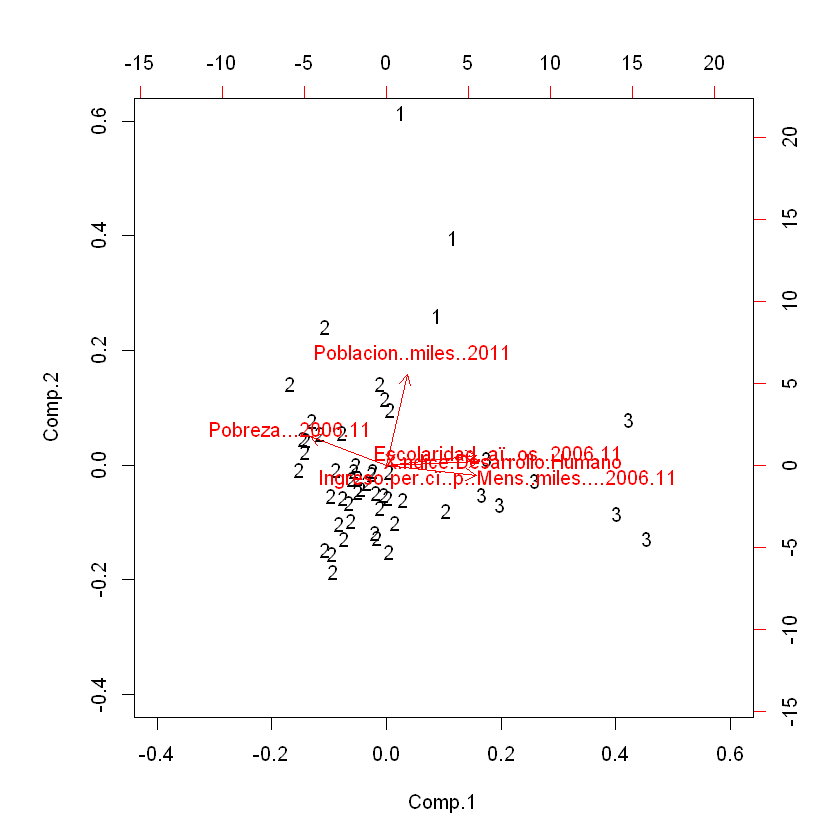

In [35]:
res <- princomp(datos, cor=TRUE)

biplot(res,xlabs=grupoComuna, xlim = c(-0.4,0.6),ylim = c(-0.4,0.6))

# Cambian algunas variables las cuales se muestran un poco distinto a otros sistemas de clustering
# Pero en general el resultado es bastante similar y las agrupaciones también